In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
registration = pd.read_csv('registration_log.csv',sep = ',')
purchase = pd.read_csv('purchase_log.csv',sep = ',')
app_open = pd.read_csv('app_open_log.csv',sep = ',')

In [3]:
registration['signup_time'] = pd.to_datetime(registration['signup_time'],format = '%Y-%m-%d %H:%M:%S')
purchase['purchase_time'] = pd.to_datetime(purchase['purchase_time'],format = '%Y-%m-%d %H:%M:%S')
app_open['app_open_time']= pd.to_datetime(app_open['app_open_time'],format = '%Y-%m-%d %H:%M:%S')

In [4]:
def date_convert(df):
    df['year'] = df.iloc[:,1].dt.year
    df['month'] = df.iloc[:,1].dt.month
    df['day'] = df.iloc[:,1].dt.day
    df['hour'] = df.iloc[:,1].dt.hour
    df['minute'] = df.iloc[:,1].dt.minute
    df['second'] = df.iloc[:,1].dt.second




In [5]:
date_convert(registration)
date_convert(purchase)
date_convert(app_open)

In [6]:
registration.drop(columns = ['signup_time','year'],inplace = True)
app_open.drop(columns = ['app_open_time','year'],inplace = True)

In [7]:
registration

,user_id,month,day,hour,minute,second
0,c2e117bb5f8d9107525ad234b7195eba,1,1,1,12,17
1,8ff943305e147405b2f188a9ce52343d,1,1,1,54,53
2,a488b0d03a56cf7f45b93981209a5a42,1,1,2,0,43
3,450f15f6910c722cefd0b7aa17389181,1,1,2,19,12
4,d2e5f02028da9445537913c73cdc5f4c,1,1,2,37,45
...,...,...,...,...,...,...
6362,752c2074aae11baf7b1f007cb4640822,6,30,21,46,59
6363,dccd1e3894623661540033f696558d1f,6,30,21,50,55
6364,907d24bff1daae8182163c55b961152e,6,30,21,55,23
6365,8d68dc56ad7584fd694ffbf38bb4ad49,6,30,23,22,13


In [8]:
app_open

,user_id,month,day,hour,minute,second
0,c2e117bb5f8d9107525ad234b7195eba,1,1,1,12,18
1,c2e117bb5f8d9107525ad234b7195eba,1,1,1,12,18
2,c2e117bb5f8d9107525ad234b7195eba,1,1,1,12,19
3,c2e117bb5f8d9107525ad234b7195eba,1,1,1,12,31
4,c2e117bb5f8d9107525ad234b7195eba,1,1,1,12,34
...,...,...,...,...,...,...
603110,752c2074aae11baf7b1f007cb4640822,9,1,23,3,3
603111,752c2074aae11baf7b1f007cb4640822,9,1,23,3,8
603112,752c2074aae11baf7b1f007cb4640822,9,1,23,3,23
603113,752c2074aae11baf7b1f007cb4640822,9,1,23,3,33


In [9]:
combine = pd.merge(app_open, registration, how='inner', on="user_id")
combine['cohort_index'] = (combine['month_x']-combine['month_y'])+1




In [10]:
combine

,user_id,month_x,day_x,hour_x,minute_x,second_x,month_y,day_y,hour_y,minute_y,second_y,cohort_index
0,c2e117bb5f8d9107525ad234b7195eba,1,1,1,12,18,1,1,1,12,17,1
1,c2e117bb5f8d9107525ad234b7195eba,1,1,1,12,18,1,1,1,12,17,1
2,c2e117bb5f8d9107525ad234b7195eba,1,1,1,12,19,1,1,1,12,17,1
3,c2e117bb5f8d9107525ad234b7195eba,1,1,1,12,31,1,1,1,12,17,1
4,c2e117bb5f8d9107525ad234b7195eba,1,1,1,12,34,1,1,1,12,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
603110,a21792a5c739601f1bfb7461d6a0fa20,8,14,13,49,15,3,1,12,16,57,6
603111,4f8e2d2e0b6a5b3f1980f0e1dee90a47,8,3,17,53,38,6,19,8,10,54,3
603112,4f8e2d2e0b6a5b3f1980f0e1dee90a47,8,3,17,53,40,6,19,8,10,54,3
603113,4f8e2d2e0b6a5b3f1980f0e1dee90a47,8,3,17,53,54,6,19,8,10,54,3


In [12]:
cohort_data = combine.groupby(['month_y', 'cohort_index'])['user_id'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_data.pivot_table(index = 'month_y',
                                       columns = 'cohort_index',
                                       values = 'user_id')


### 把數字轉為留存率

In [12]:
totalcol = cohort_count.shape[1]
initial = cohort_count.iloc[:,0]
for i in range(1,totalcol):
    cohort_count.iloc[:,i] = cohort_count.iloc[:,i] /initial 

In [13]:
cohort_count

cohort_index,1,2,3,4,5,6,7,8,9
month_y,,,,,,,,,
1,712.0,0.415730,0.282303,0.235955,0.224719,0.189607,0.167135,0.148876,0.140449
2,882.0,0.366213,0.258503,0.222222,0.180272,0.182540,0.172336,0.136054,NaN
3,1329.0,0.398044,0.299473,0.200903,0.197893,0.156509,0.141460,NaN,NaN
4,1254.0,0.392344,0.255183,0.251196,0.210526,0.158692,NaN,NaN,NaN
5,1119.0,0.384272,0.308311,0.230563,0.196604,NaN,NaN,NaN,NaN
6,977.0,0.440123,0.308086,0.227226,NaN,NaN,NaN,NaN,NaN


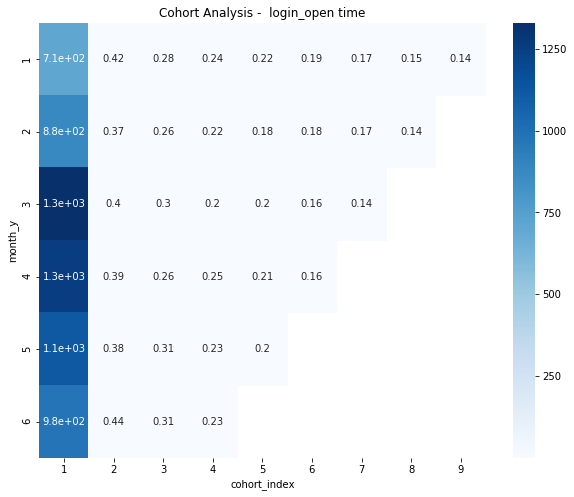

In [19]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.title('Cohort Analysis -  login_open time')
ax = sns.heatmap(data = cohort_count, 
            annot = True, 
            cmap = "Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

